# 画像生成モデル基礎

画像生成モデル（VAEやDiffusionなど）を勉強、実装するにあたって必要な基礎知識の確認。  
全部まとめてると大変なのでポイントに絞って確認する。

### 中心極限定理

正規分布が特別視される理由として**中心極限定理（Central Limit Theorem）**がある。  

ここでなんらかの確率分布$p(x)$を仮定する（どんな分布でもよい）。この時、$p(x)$から独立に生成されたサンプルを$\{ x^{(1)}, x^{(2)} , \ldots ,x^{(N)} \}$とするとサンプル平均は次のようになる。  
$$\bar{x} = \frac{\sum_{i=1}^{N} x^{(i)}}{N}$$  
この時、$\bar{x}$は近似的に正規分布に従うことが分かっている。（$p(x)$は任意の確率分布にも関わらず）

以下では$p(x)$を0~1の一様分布として中心極限定理が成り立つことを確認する。

In [1]:
import numpy as np

N = 10000 # サンプルサイズ
xs = []
for n in range(N):
    x = np.random.rand() # 0から1の一様分布からのサンプリング
    xs.append(x)

mean = np.mean(xs)
variance = np.std(xs)**2
print(f"mean: {mean}, variance: {variance}")

mean: 0.501974331535305, variance: 0.08444110104530499


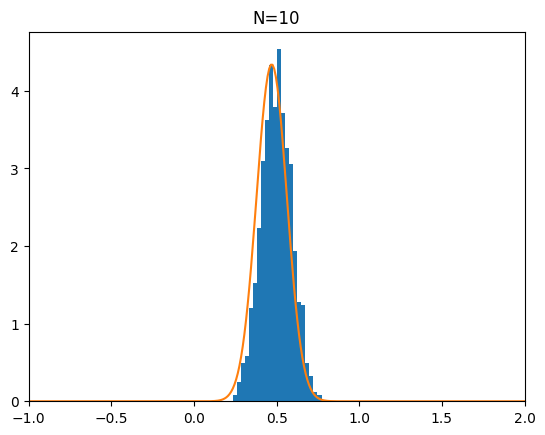

In [2]:
import matplotlib.pyplot as plt

x_means = []
N = 10 # サンプルサイズ

for _ in range(1000):
    xs = []
    for n in range(N):
        x = np.random.rand()
        xs.append(x)
    mean = np.mean(xs)
    x_means.append(mean)

# 比較用の正規分布
def normal(x, mu=0, sigma=1):
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return y
x_norm = np.linspace(-5, 5, 1000)
#mu = 0.5
#sigma = np.sqrt(1 / 12 / N)
mu = mean
sigma = np.sqrt(variance / N)
y_norm = normal(x_norm, mu, sigma)

# グラフの描画
plt.hist(x_means, bins="auto",density=True)
plt.plot(x_norm, y_norm)
plt.title(f"N={N}")
plt.xlim(-1, 2)
plt.show()

0.5091493408107824 0.09189183916175853


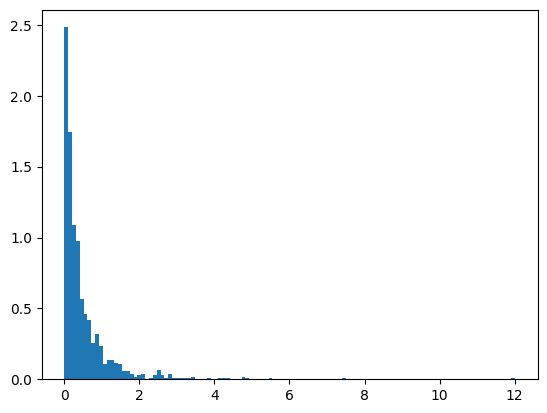

In [3]:
# 別の確率分布からのサンプリングでも試す
s = np.random.pareto(3., 1000)
mu = s.mean()
variance = s.std()**2
print(mu, sigma)
plt.hist(s, bins="auto",density=True)
plt.show()

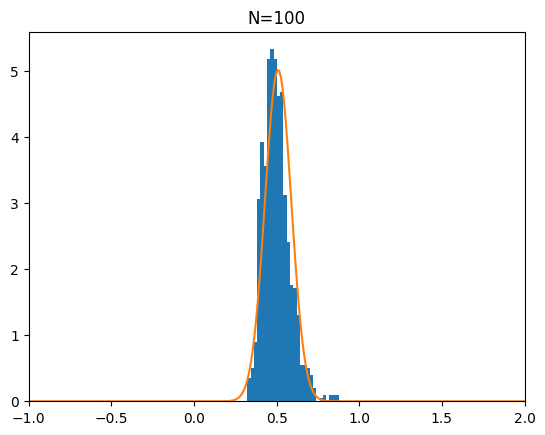

In [4]:
import matplotlib.pyplot as plt

x_means = []
N = 100 # サンプルサイズ

for _ in range(1000):
    xs = np.random.pareto(3., N)
    mean = np.mean(xs)
    x_means.append(mean)

# 比較用の正規分布
def normal(x, mu=0, sigma=1):
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return y
x_norm = np.linspace(-5, 5, 1000)
mu = mu
sigma = np.sqrt(variance / N)
y_norm = normal(x_norm, mu, sigma)

# グラフの描画
plt.hist(x_means, bins="auto",density=True)
plt.plot(x_norm, y_norm)
plt.title(f"N={N}")
plt.xlim(-1, 2)
plt.show()